# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_moose.csv")

In [3]:
df.head()

,FAMILY,Scientific name,CAT,Kriterien IUCN,NHV,Bemerkungen
0,Hornmoose – Anthocerotae,Anthoceros agrestis Paton,LC,NaN,NaN,abhängig von ökologischen Ausgleichsmassnahmen
1,Hornmoose – Anthocerotae,Phaeoceros laevis (L.) Prosk.,NE,NaN,NaN,NaN
2,Hornmoose – Anthocerotae,Phaeoceros laevis (L.) Prosk. subsp. carolinia...,EN,A2b; B1ab(iv)+2ab(iv),CH §,abhängig von ökologischen Ausgleichsmassnahmen
3,Lebermoose – Hepaticae,Anastrepta orcadensis (Hook.) Schiffn.,VU,D2,NaN,NaN
4,Lebermoose – Hepaticae,Anastrophyllum assimile (Mitt.) Steph.,EN,A2b; B1ab(iv)+2ab(iv),NaN,NaN


In [4]:
len (df)

1153

In [5]:
df.pop("Kriterien IUCN")
df.pop("NHV")

0        NaN
1        NaN
2       CH §
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
1123     NaN
1124     NaN
1125     NaN
1126     NaN
1127     NaN
1128     NaN
1129     NaN
1130     NaN
1131     NaN
1132     NaN
1133     NaN
1134     NaN
1135     NaN
1136     NaN
1137     NaN
1138     NaN
1139     NaN
1140     NaN
1141     NaN
1142     NaN
1143     NaN
1144     NaN
1145     NaN
1146     NaN
1147     NaN
1148     NaN
1149     NaN
1150     NaN
1151     NaN
1152     NaN
Name: NHV, Length: 1153, dtype: object

In [6]:
df.rename(columns={"FAMILY":"family","Scientific name": "sc name","CAT":"cat", "Bemerkungen":"bemerkungen"},inplace=True)

In [7]:
df.head(2)

,family,sc name,cat,bemerkungen
0,Hornmoose – Anthocerotae,Anthoceros agrestis Paton,LC,abhängig von ökologischen Ausgleichsmassnahmen
1,Hornmoose – Anthocerotae,Phaeoceros laevis (L.) Prosk.,NE,NaN


In [8]:
df['einteilung'] = 'Pflanzen'
df['untergruppe'] = 'Moose'

In [9]:
df.head(2)

,family,sc name,cat,bemerkungen,einteilung,untergruppe
0,Hornmoose – Anthocerotae,Anthoceros agrestis Paton,LC,abhängig von ökologischen Ausgleichsmassnahmen,Pflanzen,Moose
1,Hornmoose – Anthocerotae,Phaeoceros laevis (L.) Prosk.,NE,NaN,Pflanzen,Moose


In [10]:
df["cat"].value_counts()

LC      509
VU      282
DD       99
NT       67
CR       61
NE       60
EN       58
RE       15
Kat.      1
Name: cat, dtype: int64

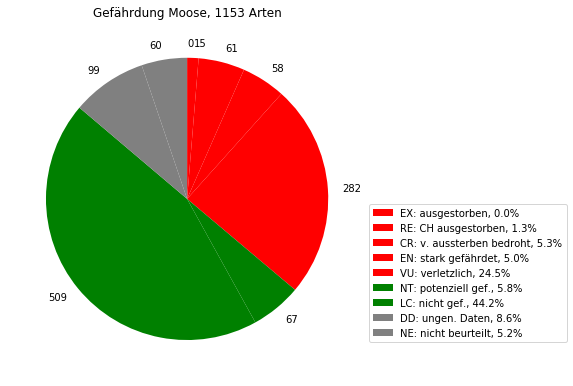

In [11]:
values = [0, 15, 61, 58, 282, 67, 509, 99, 60]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Moose, 1153 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()